# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | bandarbeyla
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | diego de almagro
Processing Record 8 of Set 1 | gadzhiyevo
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | urangan
Processing Record 18 of Set 1 | kalinovskaya
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | el jadid
Processing Record 21 of Set 1 | igarka
Processing Record 22 of Set 1 | tranovaho

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0    geraldton -28.7667  114.6000    284.38        93           0        1.54   
1    hithadhoo  -0.6000   73.0833    301.25        75          77        1.52   
2  bandarbeyla   9.4942   50.8122    298.44        85          19       14.65   
3      stanley  54.8680   -1.6985    288.09        82          75        4.12   
4        tiksi  71.6872  128.8694    282.02       100         100        1.40   

  Country        Date  
0      AU  1693063860  
1      MV  1693063990  
2      SO  1693063991  
3      GB  1693063991  
4      RU  1693063991

In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0          geraldton -28.7667  114.6000    284.38        93           0   
1          hithadhoo  -0.6000   73.0833    301.25        75          77   
2        bandarbeyla   9.4942   50.8122    298.44        85          19   
3            stanley  54.8680   -1.6985    288.09        82          75   
4              tiksi  71.6872  128.8694    282.02       100         100   

         Wind Speed Country        Date  
City_ID                                  
0              1.54      AU  1693063860  
1              1.52      MV  1693063990  
2             14.65      SO  1693063991  
3              4.12      GB  1693063991  
4              1.40      RU  1693063991

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

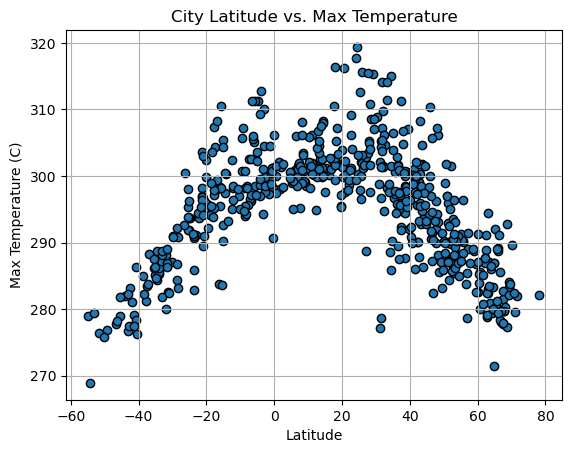

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

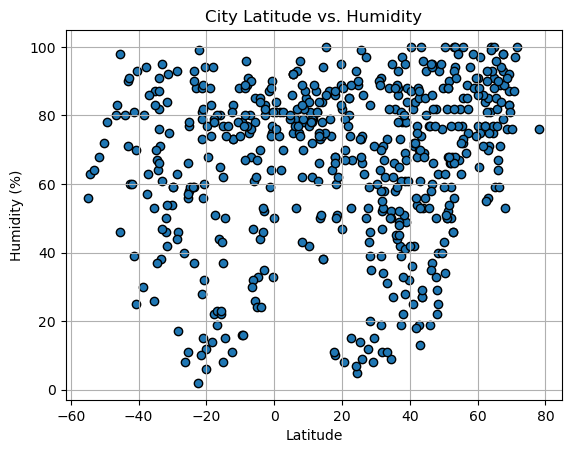

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

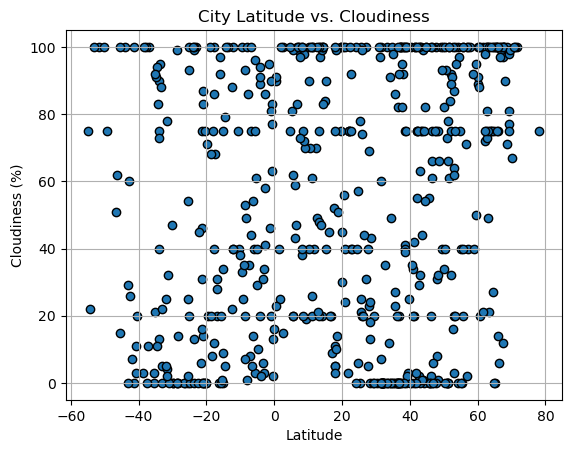

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

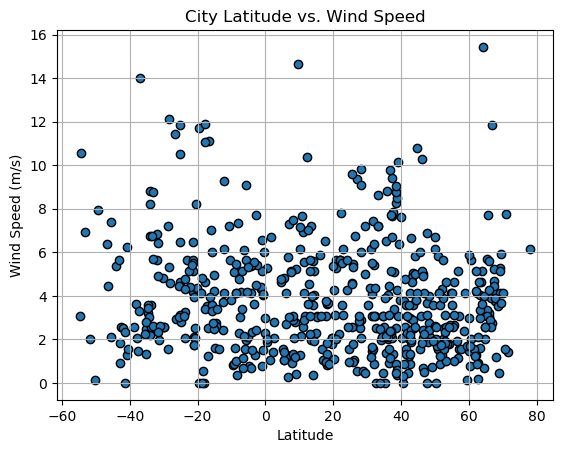

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def plot_linear_regression(main_df, xcolumn_str, ycolumn_str):

    x_values = main_df[xcolumn_str]
    y_values = main_df[ycolumn_str]
    # Build the scatter plots for latitude vs. wind speed
    plt.scatter(x_values, y_values, marker='o')

    # Incorporate the other graph properties
    plt.title(f"{xcolumn_str} vs. {ycolumn_str}")
    plt.ylabel(ycolumn_str)
    plt.xlabel(xcolumn_str)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    x = x_values.min()
    y = y_values.min()
    plt.annotate(line_eq,(x, y),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

    return

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
2        bandarbeyla   9.4942   50.8122    298.44        85          19   
3            stanley  54.8680   -1.6985    288.09        82          75   
4              tiksi  71.6872  128.8694    282.02       100         100   
5        yellowknife  62.4560 -114.3525    291.16        85          75   
7         gadzhiyevo  69.2551   33.3362    283.11        83          77   

         Wind Speed Country        Date  
City_ID                                  
2             14.65      SO  1693063991  
3              4.12      GB  1693063991  
4              1.40      RU  1693063991  
5              4.12      CA  1693063793  
7              5.28      RU  1693063992

In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                        
0               geraldton -28.7667  114.6000    284.38        93           0   
1               hithadhoo  -0.6000   73.0833    301.25        75          77   
6        diego de almagro -26.3667  -70.0500    300.41         8           0   
8        flying fish cove -10.4217  105.6791    296.97        88          40   
10                   tual  -5.6667  132.7500    298.44        85          96   

         Wind Speed Country        Date  
City_ID                                  
0              1.54      AU  1693063860  
1              1.52      MV  1693063990  
6              2.92      CL  1693063992  
8              5.66      CX  1693063992  
10             9.11      ID  1693063993

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5067963096007346


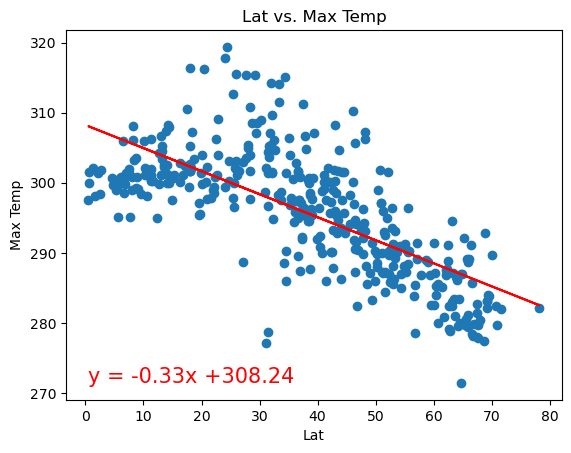

In [36]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7096953549619655


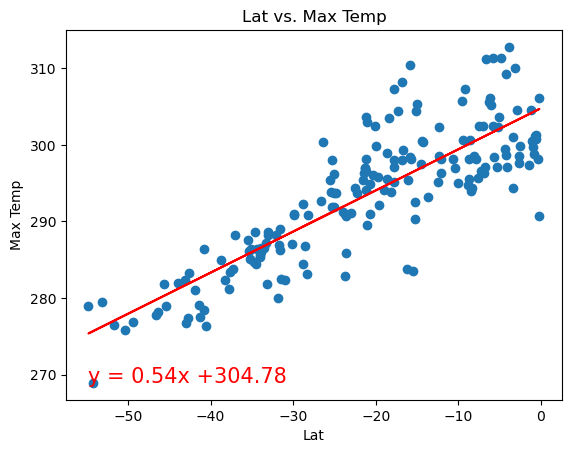

In [37]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015115756701820396


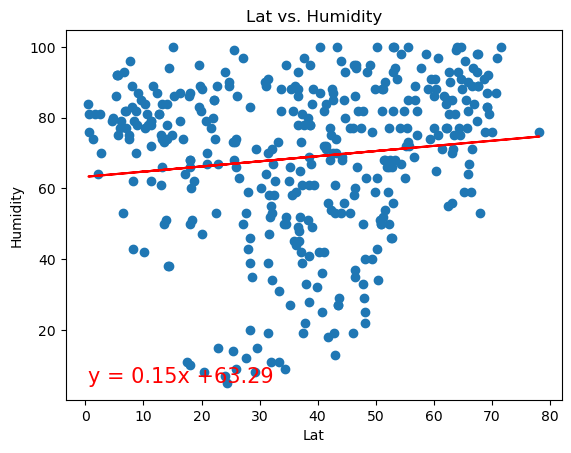

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.0024091317160764513


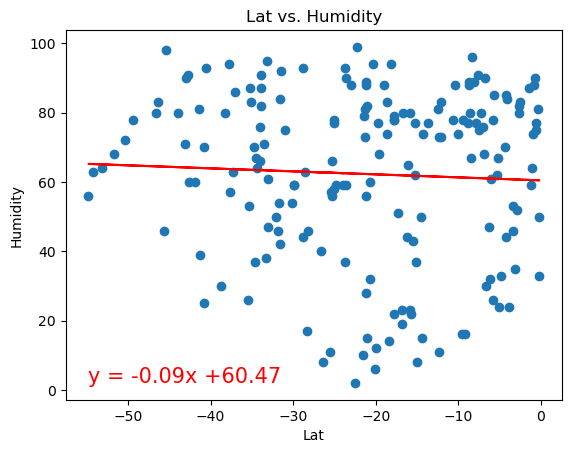

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011838032617788881


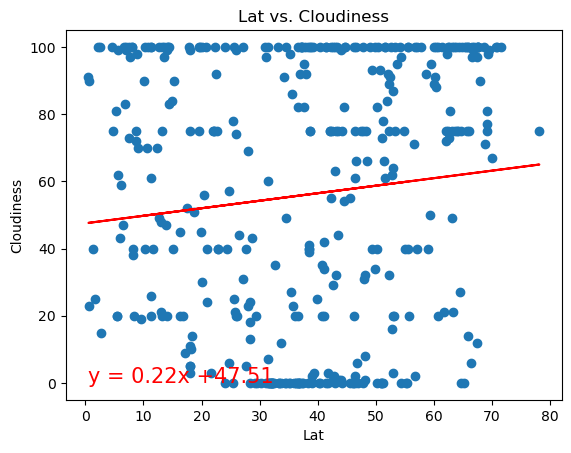

In [40]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 3.6450309407945945e-05


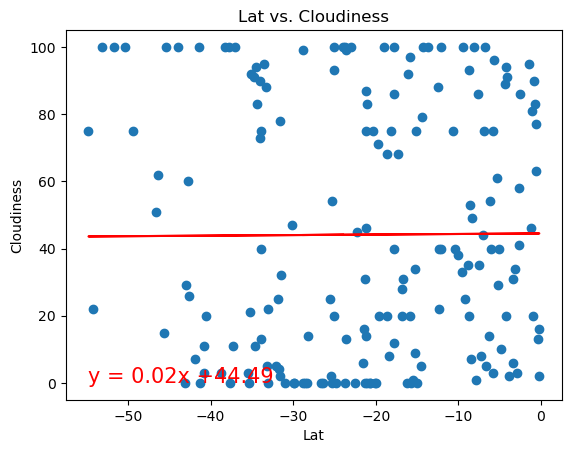

In [41]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0026341602517689472


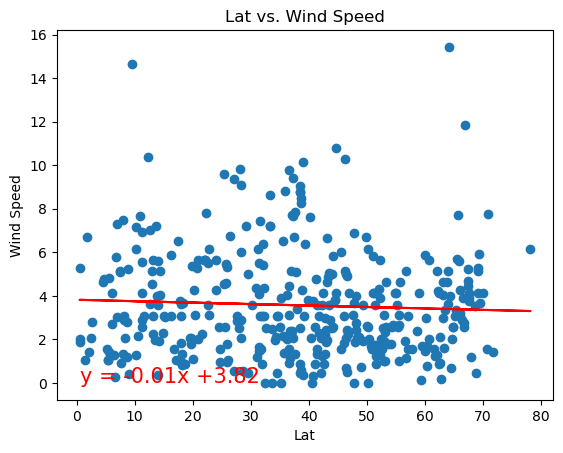

In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.00696510874175612


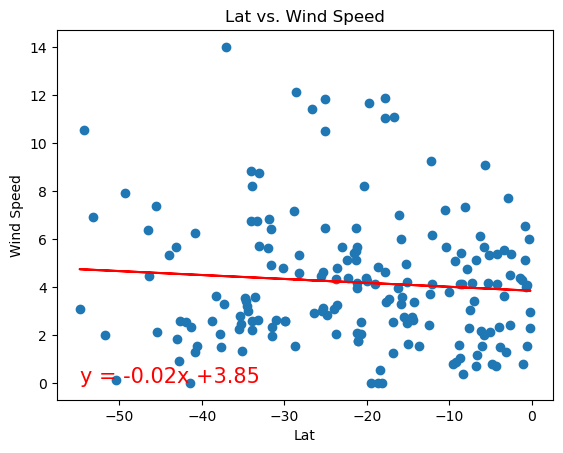

In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE